Importing the libraries


In [ ]:
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

Importing the Dataset

In [ ]:
import os, pandas as pd

df_data = pd.read_csv('/content/Churn_Modelling (AI).csv')
print(df_data)
df_data.head(5)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

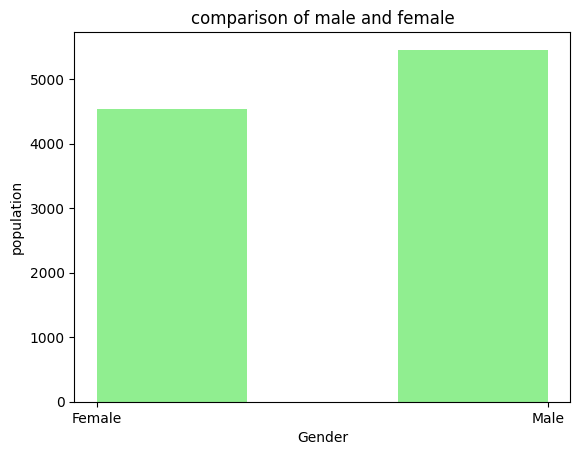

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = df_data.Gender, bins = 3, color = 'lightgreen')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [ ]:
df_data['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [ ]:
df_data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

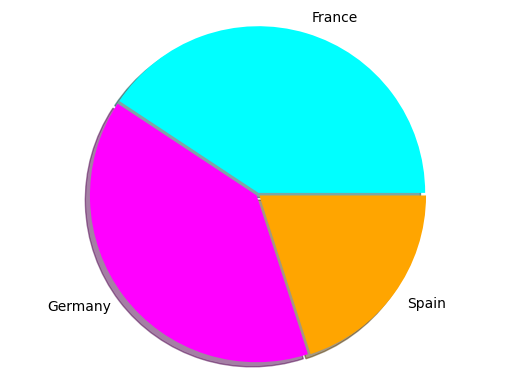

In [ ]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

Remove handle null values (if any).

Data Preprocessing

In [ ]:
null_values=df_data.isnull()
null_values1=df_data.isnull().values.any()
print(null_values)
print(null_values1)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [ ]:
duplicate_mask = df_data.duplicated() # Use df_data instead of df
duplicates = df_data[duplicate_mask]
duplicates1 = df_data[duplicate_mask].values.any()
print(duplicates)
print(duplicates1)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
False


In [ ]:
data = df_data.drop_duplicates() # Use df_data_2 instead of df
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
customer_data = df_data

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data = {'Gender': ['Male', 'Female', 'Male']}
df = pd.DataFrame(data)

In [ ]:
#Label Encoding for encoding categorical columns
from sklearn.preprocessing import LabelEncoder
df['Gender_Encoded'] = LabelEncoder().fit_transform(df['Gender'])
df['Gender'].unique()
df

,Gender,Gender_Encoded
0,Male,1
1,Female,0
2,Male,1


In [ ]:
#Dummy variable creation for encoding categorical columns
df_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, df_dummies], axis=1)
print(df)

   Gender  Gender_Encoded  Gender_Female  Gender_Male
0    Male               1          False         True
1  Female               0           True        False
2    Male               1          False         True


Select x (independent variable) and y (dependent variable) - Exited(1 or 0)

In [ ]:
# Select x (independent variable) and y (dependent variable) - Exited(1 or 0)
x = df_data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_data['Exited']

print(x.head())
print(y.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = df_data.iloc[:,0:10]
y = df_data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)

(10000, 10)
(10000,)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts'],
      dtype='object')


In [ ]:
x = pd.get_dummies(x)
x.head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,Surname_Abazu,Surname_Abbie,Surname_Abbott,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2,15647311,608,41,1,83807.86,1,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,3,15619304,502,42,8,159660.80,3,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,4,15701354,699,39,1,0.00,2,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,5,15737888,850,43,2,125510.82,1,False,False,False,...,False,False,False,False,False,False,False,True,True,False
5,6,15574012,645,44,8,113755.78,2,False,False,False,...,False,False,False,False,False,False,False,True,False,True
6,7,15592531,822,50,7,0.00,2,False,False,False,...,False,False,False,False,False,True,False,False,False,True
7,8,15656148,376,29,4,115046.74,4,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,9,15792365,501,44,4,142051.07,2,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9,10,15592389,684,27,2,134603.88,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True


Split data into training and test data.

In [ ]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7500, 2944)
x_test shape: (2500, 2944)
y_train shape: (7500,)
y_test shape: (2500,)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-0.702176,-1.343330,-0.735507,0.015266,0.008860,0.673160,2.535034,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,-1.485722,1.558330,1.024427,-0.652609,0.008860,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,-0.524522,-0.655156,0.808295,-0.461788,1.393293,-0.356937,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,-1.167396,1.200594,0.396614,-0.080145,0.008860,-0.009356,-0.926551,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-1.451159,0.778798,-0.467915,1.255605,0.701077,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,-0.919743,0.919743


Compute Classification metrics – confusion Matrix, classification Report.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming 'df_data_2' is your original DataFrame
x = df_data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_data['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify columns with non-numerical data
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = pd.DataFrame(encoder.fit_transform(x_train[categorical_cols]).toarray())
x_test_encoded = pd.DataFrame(encoder.transform(x_test[categorical_cols]).toarray())

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(categorical_cols)
x_train_encoded.columns = feature_names
x_test_encoded.columns = feature_names

# Drop original categorical columns and concatenate encoded ones
x_train = x_train.drop(categorical_cols, axis=1)
x_test = x_test.drop(categorical_cols, axis=1)
x_train = pd.concat([x_train, x_train_encoded], axis=1)
x_test = pd.concat([x_test, x_test_encoded], axis=1)

# Now you can scale the numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Confusion Matrix:
[[1607    0]
 [ 393    0]]


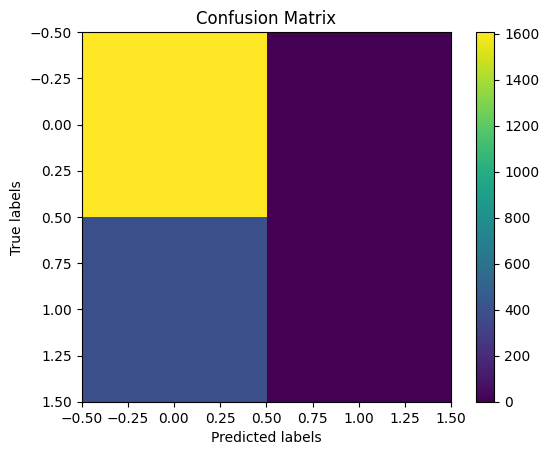

In [ ]:
df_data = pd.read_csv('//content/Churn_Modelling (AI).csv')
df_data.head()
X = df_data.iloc[:, :2] # Use .iloc to slice the DataFrame
y = df_data['Exited']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix
plt.imshow(conf_mat, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Load your dataset
X = df_data_2.iloc[:, :2] # Use .iloc to slice the DataFrame
y = df_data_2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict on test set
y_pred = rfc.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1607
           1       0.18      0.06      0.09       393

    accuracy                           0.76      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.68      0.76      0.71      2000



Apply the ANN Classification model on the training dataset and generate the
predicted value for the test dataset
&
Predict the exited status for test data

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Generate predicted values for the test data
y_pred = model.predict(X_test)

# Convert predicted values to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)


Epoch 1/10
63/63 - 1s - loss: 85985.7734 - accuracy: 0.6658 - 1s/epoch - 16ms/step
Epoch 2/10
63/63 - 0s - loss: 11929.3818 - accuracy: 0.6651 - 114ms/epoch - 2ms/step
Epoch 3/10
63/63 - 0s - loss: 10925.6602 - accuracy: 0.6766 - 101ms/epoch - 2ms/step
Epoch 4/10
63/63 - 0s - loss: 10741.9570 - accuracy: 0.6795 - 120ms/epoch - 2ms/step
Epoch 5/10
63/63 - 0s - loss: 8540.6387 - accuracy: 0.6791 - 104ms/epoch - 2ms/step
Epoch 6/10
63/63 - 0s - loss: 10870.8711 - accuracy: 0.6749 - 106ms/epoch - 2ms/step
Epoch 7/10
63/63 - 0s - loss: 20666.6504 - accuracy: 0.6735 - 101ms/epoch - 2ms/step
Epoch 8/10
63/63 - 0s - loss: 15378.7314 - accuracy: 0.6791 - 109ms/epoch - 2ms/step
Epoch 9/10
63/63 - 0s - loss: 12968.5879 - accuracy: 0.6585 - 111ms/epoch - 2ms/step
Epoch 10/10
63/63 - 0s - loss: 14217.2441 - accuracy: 0.6787 - 104ms/epoch - 2ms/step
63/63 [==============================] - 0s 2ms/step - loss: 34246.3906 - accuracy: 0.1965
Test accuracy: 0.197
63/63 [==============================] -

Report the ANN model accuracy.

In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
